In [1]:
import numpy as np
import matplotlib
import pylab as plt

import sys
sys.path.append('../../')

import hallgerd
from hallgerd.cpu.core import Sequential, cross_entropy_delta
from hallgerd.cpu.layers import Dense

In [2]:
import sklearn
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [3]:
X, y = make_classification(n_samples=100000, n_features=2000, n_informative=2000,
                           n_redundant=0,
                           n_classes=5)
# y = y[:,np.newaxis]
y = OneHotEncoder(sparse=False, categories='auto').fit_transform(y.reshape((-1,1)))
X = StandardScaler().fit_transform(X)
y = y.T
X = X.T

In [4]:
X.shape, y.shape

((2000, 100000), (5, 100000))

In [6]:
model = Sequential(lr=1e-3, batch_size=256, epochs=40, loss='cross_entropy')
model.add(Dense(2000, 2000, activation='relu'))
model.add(Dense(2000, 5, activation='softmax'))
model.fit(X, y)

  0%|          | 0/40 [00:00<?, ?it/s]../../hallgerd/cpu/layers.py:7: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x - np.max(x)) / np.sum(np.exp(x - np.max(x)), axis=0)
../../hallgerd/cpu/layers.py:15: RuntimeWarning: invalid value encountered in less_equal
  x[x <= 0] = 0
../../hallgerd/cpu/layers.py:20: RuntimeWarning: invalid value encountered in greater
  x[x > 0] = 1


KeyboardInterrupt: 

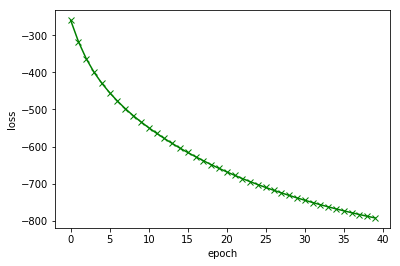

In [7]:
plt.plot(model.history['loss'], 'gx-')
plt.xlabel('epoch'); plt.ylabel('loss')
plt.show()

In [8]:
yt = y.argmax(axis=0)
ypp = model(X)
yp = ypp.argmax(axis=0)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(yt, yp))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       202
           1       0.91      0.92      0.91       199
           2       0.92      0.94      0.93       200
           3       0.91      0.89      0.90       198
           4       0.92      0.91      0.91       201

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



In [10]:
ypp[:,0]

array([2.07927538e-04, 2.80072382e-03, 6.26881243e-03, 5.83834882e-04,
       9.90138701e-01])